# [1] 데이터 요약하기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/새싹2기/python_DA/data/')

Mounted at /content/drive


In [2]:
import pandas as pd
titan = pd.read_csv("titanic.csv")
titan.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## (1) Group by

In [3]:
# step1: 그룹화
grouped = titan.groupby('sex')['age'].mean()
grouped

,age
sex,
female,27.915709
male,30.726645


In [4]:
titan.loc[titan['sex'] == 'female', 'age'].mean()

np.float64(27.915708812260537)

In [5]:
titan.loc[titan['sex'] == 'male', 'age'].mean()

np.float64(30.72664459161148)

In [6]:
titan.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [7]:
titan['embark_town'].value_counts()

,count
embark_town,
Southampton,644
Cherbourg,168
Queenstown,77


In [8]:
class_gb = titan.groupby('class').agg({'fare':'mean',
                            'age':'max',
                            'survived':'mean'})
class_gb

,fare,age,survived
class,,,
First,84.154687,80.0,0.629630
Second,20.662183,70.0,0.472826
Third,13.675550,74.0,0.242363


In [9]:
class_gb.index

Index(['First', 'Second', 'Third'], dtype='object', name='class')

In [10]:
class_gb.columns

Index(['fare', 'age', 'survived'], dtype='object')

In [11]:
class_gb.reset_index()

,class,fare,age,survived
0,First,84.154687,80.0,0.629630
1,Second,20.662183,70.0,0.472826
2,Third,13.675550,74.0,0.242363


In [12]:
titan.groupby(['class','sex'])['survived'].mean()

class   sex   
First   female    0.968085
        male      0.368852
Second  female    0.921053
        male      0.157407
Third   female    0.500000
        male      0.135447
Name: survived, dtype: float64

## 실습(6) - 1.데이터 요약하기 (groupby)

In [13]:
tips = pd.read_csv('/content/drive/MyDrive/새싹2기/python_DA/data/tips.csv')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


요일(day)별로 그룹화하여 각 요일에 대한 총 매출(total_bill)을 계산하세요.

In [14]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [15]:
tips.shape

(244, 7)

In [16]:
tips.groupby('day')['total_bill'].sum().reset_index()

,day,total_bill
0,Fri,325.88
1,Sat,1778.40
2,Sun,1627.16
3,Thur,1096.33


요일(day)별로 그룹화하여 각 요일에 대한 수치형 자료의 평균을 계산하세요.

In [17]:
col = ['total_bill','tip','size']
sales = tips.groupby('day')[col].mean().reset_index().round(2)
sales = tips.groupby('day', observed=False).mean(numeric_only=True).reset_index().round(2)
sales

,day,total_bill,tip,size
0,Fri,17.15,2.73,2.11
1,Sat,20.44,2.99,2.52
2,Sun,21.41,3.26,2.84
3,Thur,17.68,2.77,2.45


In [18]:
group = tips.groupby('day')['total_bill'].mean(numeric_only=True).sort_values()
group

,total_bill
day,
Fri,17.151579
Thur,17.682742
Sat,20.441379
Sun,21.410000


계산된 결과를 가지고, 요일 별 평균 매출을 잘 보여줄 수 있는 시각화를 수행해 보세요.

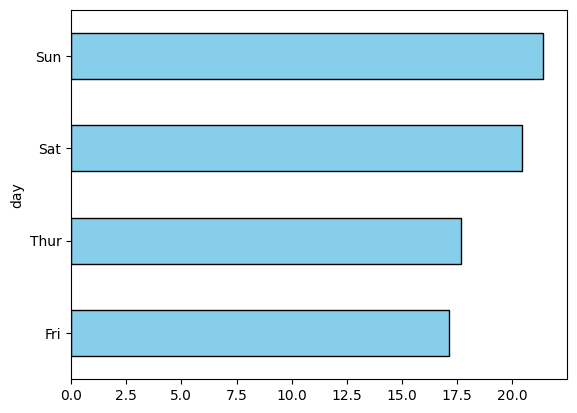

In [19]:
group.plot.barh(color='skyblue', edgecolor='black');

tips 데이터셋을 사용하여 성별(sex)별 총 팁(tip)의 합계와 평균을 계산하세요.

In [20]:
tips.groupby('sex')['tip'].agg(['sum','mean']).round(2).reset_index()

,sex,sum,mean
0,Female,246.51,2.83
1,Male,485.07,3.09


### 1. apply

In [21]:
def tip_gap(group):
  return group['tip'].max() - group['tip'].min()

In [22]:
tips.groupby(['sex','time']).apply(tip_gap).reset_index()

/tmp/ipython-input-1909590232.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tips.groupby(['sex','time']).apply(tip_gap).reset_index()


,sex,time,0
0,Female,Dinner,5.50
1,Female,Lunch,3.92
2,Male,Dinner,9.00
3,Male,Lunch,5.26


➕
smoker 컬럼을 기준으로 그룹화하고, 각 그룹의 최대 총액과 최소 총액의 차(total_bill)를 구하세요.

In [23]:
tips.groupby('smoker').apply(lambda x:x['total_bill'].max() - x['total_bill'].min())

/tmp/ipython-input-813710854.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tips.groupby('smoker').apply(lambda x:x['total_bill'].max() - x['total_bill'].min())


,0
smoker,
No,41.08
Yes,47.74


### 2. filter: 특정 그룹만 남기기

In [24]:
tips.groupby('sex').filter(lambda group: len(group) > 30)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [25]:
tips.groupby(['sex','smoker']).filter(lambda group: group['tip'].mean() > 3)

,total_bill,tip,sex,smoker,day,time,size
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
...,...,...,...,...,...,...,...
236,12.60,1.00,Male,Yes,Sat,Dinner,2
237,32.83,1.17,Male,Yes,Sat,Dinner,2
239,29.03,5.92,Male,No,Sat,Dinner,3
241,22.67,2.00,Male,Yes,Sat,Dinner,2


### 3. transform : 그룹 값 기준으로 컬럼 추가

In [26]:
tips.loc[:,'avg_bill_by_sex'] = tips.groupby('sex')['total_bill'].transform('mean')

# [2] 데이터 합치기

## (1) concat

In [27]:
df1 = pd.DataFrame({'A': ['A0', 'A1'], 'B': ['B0', 'B1']})
df2 = pd.DataFrame({'A': ['A2', 'A3'], 'B': ['B2', 'B3']})

In [28]:
df1

,A,B
0,A0,B0
1,A1,B1


In [29]:
df2

,A,B
0,A2,B2
1,A3,B3


In [30]:
# 행 방향 연결
pd.concat([df1, df2])

,A,B
0,A0,B0
1,A1,B1
0,A2,B2
1,A3,B3


In [31]:
pd.concat([df1, df2], ignore_index=True)

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3


In [32]:
# 열 방향
pd.concat([df1, df2], axis=1)

,A,B,A,B
0,A0,B0,A2,B2
1,A1,B1,A3,B3


In [33]:
pd.concat([df1, df2], axis=1, ignore_index=True) # 열에 적용하는 건 오바

,0,1,2,3
0,A0,B0,A2,B2
1,A1,B1,A3,B3


## (2) merge

In [34]:
df_left = pd.DataFrame({'K': ['K0', 'K1', 'K2', 'K3'],
                        'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3']})

df_right = pd.DataFrame({'K': ['K0', 'K1', 'K2','K4'],
                         'C': ['C0', 'C1', 'C2','C3'],
                         'D': ['D0', 'D1', 'D2','D3']})

In [35]:
df_left

,K,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [36]:
df_right

,K,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K4,C3,D3


### 1. inner join

In [37]:
pd.merge(df_left, df_right, how='inner', on='K')

,K,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2


### 2.left join

In [38]:
pd.merge(df_left, df_right, how='left', on='K')

,K,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,NaN,NaN


### 실습 - 데이터 합치기


tips 데이터프레임에서 목요일(Thur)과 금요일(Fri) 데이터만 각각 추출하여, tips_thur, tips_fri 의 데이터 프레임을 만드세요.

In [39]:
tips_thur = tips[tips['day'] == 'Thur']
tips_fri =  tips[tips['day'] == 'Fri']
tips_fri

,total_bill,tip,sex,smoker,day,time,size,avg_bill_by_sex
90,28.97,3.00,Male,Yes,Fri,Dinner,2,20.744076
91,22.49,3.50,Male,No,Fri,Dinner,2,20.744076
92,5.75,1.00,Female,Yes,Fri,Dinner,2,18.056897
93,16.32,4.30,Female,Yes,Fri,Dinner,2,18.056897
94,22.75,3.25,Female,No,Fri,Dinner,2,18.056897
95,40.17,4.73,Male,Yes,Fri,Dinner,4,20.744076
96,27.28,4.00,Male,Yes,Fri,Dinner,2,20.744076
97,12.03,1.50,Male,Yes,Fri,Dinner,2,20.744076
98,21.01,3.00,Male,Yes,Fri,Dinner,2,20.744076
99,12.46,1.50,Male,No,Fri,Dinner,2,20.744076


tips_thur와 tips_fri를 행을 기준으로 합치고 tips_concat 로 만드세요.

In [40]:
tips_concat = pd.concat([tips_thur, tips_fri], ignore_index=True)
tips_concat

,total_bill,tip,sex,smoker,day,time,size,avg_bill_by_sex
0,27.20,4.00,Male,No,Thur,Lunch,4,20.744076
1,22.76,3.00,Male,No,Thur,Lunch,2,20.744076
2,17.29,2.71,Male,No,Thur,Lunch,2,20.744076
3,19.44,3.00,Male,Yes,Thur,Lunch,2,20.744076
4,16.66,3.40,Male,No,Thur,Lunch,2,20.744076
...,...,...,...,...,...,...,...,...
76,8.58,1.92,Male,Yes,Fri,Lunch,1,20.744076
77,15.98,3.00,Female,No,Fri,Lunch,3,18.056897
78,13.42,1.58,Male,Yes,Fri,Lunch,2,20.744076
79,16.27,2.50,Female,Yes,Fri,Lunch,2,18.056897


In [41]:
# 요일 정보 테이블 생성
df_day = pd.DataFrame({
    'day': ['Thur', 'Fri', 'Sat', 'Sun'],
    'promotion': ['No', 'Yes', 'Yes', 'No']
})

tips 데이터프레임와 요일 정보 테이블을 merge 해 보세요

In [42]:
pd.merge(tips, df_day, how= 'left', on='day')

,total_bill,tip,sex,smoker,day,time,size,avg_bill_by_sex,promotion
0,16.99,1.01,Female,No,Sun,Dinner,2,18.056897,No
1,10.34,1.66,Male,No,Sun,Dinner,3,20.744076,No
2,21.01,3.50,Male,No,Sun,Dinner,3,20.744076,No
3,23.68,3.31,Male,No,Sun,Dinner,2,20.744076,No
4,24.59,3.61,Female,No,Sun,Dinner,4,18.056897,No
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,20.744076,Yes
240,27.18,2.00,Female,Yes,Sat,Dinner,2,18.056897,Yes
241,22.67,2.00,Male,Yes,Sat,Dinner,2,20.744076,Yes
242,17.82,1.75,Male,No,Sat,Dinner,2,20.744076,Yes


In [43]:
# 요일과 시간대별로 프로모션 정보를 다르게 부여
df_day_time = pd.DataFrame({
    'day': ['Thur', 'Thur', 'Fri', 'Fri', 'Sat', 'Sat', 'Sun', 'Sun'],
    'time': ['Lunch', 'Dinner', 'Lunch', 'Dinner', 'Lunch', 'Dinner', 'Lunch', 'Dinner'],
    'promotion': ['No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No']
})

tips와 요일·시간대별 promotion 정보를 merge해서 tips_with_promo_time 데이터 프레임을 만드세요.

In [44]:
tips_with_promo_time = pd.merge(tips, df_day_time, how='left', on=['day', 'time'])
tips_with_promo_time

,total_bill,tip,sex,smoker,day,time,size,avg_bill_by_sex,promotion
0,16.99,1.01,Female,No,Sun,Dinner,2,18.056897,No
1,10.34,1.66,Male,No,Sun,Dinner,3,20.744076,No
2,21.01,3.50,Male,No,Sun,Dinner,3,20.744076,No
3,23.68,3.31,Male,No,Sun,Dinner,2,20.744076,No
4,24.59,3.61,Female,No,Sun,Dinner,4,18.056897,No
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,20.744076,Yes
240,27.18,2.00,Female,Yes,Sat,Dinner,2,18.056897,Yes
241,22.67,2.00,Male,Yes,Sat,Dinner,2,20.744076,Yes
242,17.82,1.75,Male,No,Sat,Dinner,2,20.744076,Yes


In [45]:
tips[['day', 'time']].drop_duplicates()

,day,time
0,Sun,Dinner
19,Sat,Dinner
77,Thur,Lunch
90,Fri,Dinner
220,Fri,Lunch
243,Thur,Dinner


앞서 구한 프로모션 여부에 따른 평균 팁 차이 구해 보세요.

In [46]:
tips_with_promo_time.groupby('promotion')['tip'].mean().round(2).reset_index()

,promotion,tip
0,No,3.03
1,Yes,2.95


# [3] 데이터 재구조화

## (1) melt

In [50]:
df = pd.DataFrame({
    "customer": ["A", "B"],
    "2024-06": [100, 200],
    "2024-07": [110, 210],
    "2024-08": [130, 190]
})
df.melt()

,variable,value
0,customer,A
1,customer,B
2,2024-06,100
3,2024-06,200
4,2024-07,110
5,2024-07,210
6,2024-08,130
7,2024-08,190


In [57]:
df_melted = df.melt(id_vars='customer',
            var_name= 'month',
            value_name= 'sales')

<Axes: xlabel='month'>

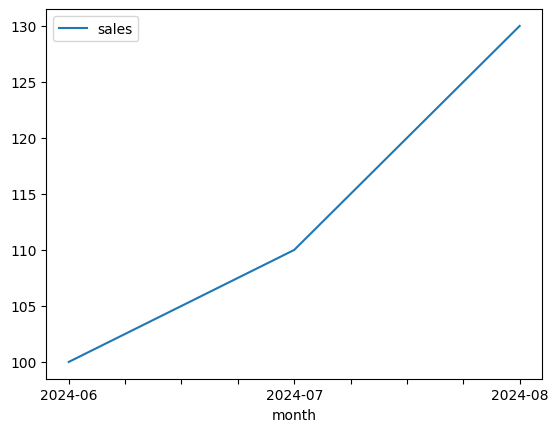

In [59]:
df_melted[df_melted['customer']=='A'].plot.line(x='month', y='sales')

<Axes: xlabel='month'>

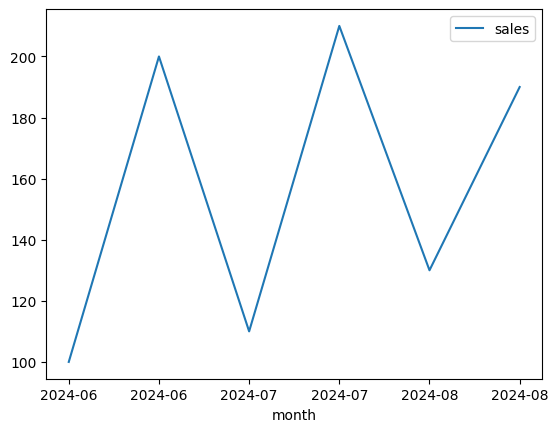

In [61]:
df_melted.plot.line(x='month', y='sales')

## (2) pivot

In [62]:
long_df = pd.DataFrame({
    'Date': ['2021-01-01', '2021-01-01', '2021-01-02', '2021-01-02'],
    'Type': ['A', 'B', 'A', 'B'],
    'Value': [100, 200, 300, 400]
})

In [63]:
long_df

,Date,Type,Value
0,2021-01-01,A,100
1,2021-01-01,B,200
2,2021-01-02,A,300
3,2021-01-02,B,400


In [64]:
long_df.pivot(index='Date',
              columns='Type',
              values='Value')

Type,A,B
Date,,
2021-01-01,100,200
2021-01-02,300,400


In [68]:
long_df.loc[len(long_df),:] = ['2021-01-02','B',500]
long_df

,Date,Type,Value
0,2021-01-01,A,100.0
1,2021-01-01,B,200.0
2,2021-01-02,A,300.0
3,2021-01-02,B,400.0
4,2021-01-02,B,500.0
5,2021-01-02,B,500.0


### (3) pivot_table

In [70]:
long_df.pivot_table(index='Date',
                    columns='Type',
                    values='Value',
                    aggfunc='sum')

Type,A,B
Date,,
2021-01-01,100.0,200.0
2021-01-02,300.0,1400.0


In [71]:
long_df.groupby(['Date','Type'])['Value'].sum()

Date        Type
2021-01-01  A        100.0
            B        200.0
2021-01-02  A        300.0
            B       1400.0
Name: Value, dtype: float64

### (4) unstack

In [72]:
long_df.groupby(['Date','Type'])['Value'].sum().unstack()
# long_df.pivot_table과 같

Type,A,B
Date,,
2021-01-01,100.0,200.0
2021-01-02,300.0,1400.0


In [73]:
long_df.groupby(['Date','Type'])['Value'].sum().unstack().reset_index()

Type,Date,A,B
0,2021-01-01,100.0,200.0
1,2021-01-02,300.0,1400.0


### 실습 - 데이터 재구조화

pivot_table을 사용하여 요일(day)을 행으로, 시간(time)을 컬럼으로 하고, 값으로는 팁(tip)의 평균을 사용하여 데이터를 재구조화하세요.

In [89]:
tips.pivot_table(index = 'day',
                 columns = 'time',
                 values='tip',
                 aggfunc='sum')

time,Dinner,Lunch
day,,
Fri,35.28,16.68
Sat,260.40,NaN
Sun,247.39,NaN
Thur,3.00,168.83



melt 를 사용하여, time, day을 식별열로, total_bill, tip, size를 값으로 하는 데이터 셋을 생성해 보세요.

In [76]:
melted_tips = pd.melt(tips,
                      id_vars=['time','day'],
                      value_vars = ['total_bill','tip','size'])

,time,day,variable,value
0,Dinner,Sun,total_bill,16.99
1,Dinner,Sun,total_bill,10.34
2,Dinner,Sun,total_bill,21.01
3,Dinner,Sun,total_bill,23.68
4,Dinner,Sun,total_bill,24.59
...,...,...,...,...
727,Dinner,Sat,size,3.00
728,Dinner,Sat,size,2.00
729,Dinner,Sat,size,2.00
730,Dinner,Sat,size,2.00


pivot_table을 사용하여 흡연자와 비흡연자의 요일별, 시간대별 평균 팁 금액 계산해 보세요.

In [79]:
tips.pivot_table(index='smoker',
                 columns = ['day','time'],
                 values = 'tip',
                 aggfunc='mean').reset_index().round(2)

day  smoker    Fri          Sat    Sun   Thur      
time        Dinner Lunch Dinner Dinner Dinner Lunch
0        No   2.75  3.00   3.10   3.17    3.0  2.67
1       Yes   3.00  2.28   2.88   3.52    NaN  3.03

In [81]:
tips.pivot_table(index=['day','time'],
                 columns = 'smoker',
                 values = 'tip',
                 aggfunc='mean').reset_index().round(2)

smoker,day,time,No,Yes
0,Fri,Dinner,2.75,3.00
1,Fri,Lunch,3.00,2.28
2,Sat,Dinner,3.10,2.88
3,Sun,Dinner,3.17,3.52
4,Thur,Dinner,3.00,NaN
5,Thur,Lunch,2.67,3.03


성별 별, 요일 별 평균 팁 금액 계산해 보세요. 이때, 최종결과를 인간이 보기 쉬운 데이터 형식으로 바꾸어서 확인해 보세요.

In [87]:
tips.groupby(['day','sex'])['tip'].mean().unstack()

sex,Female,Male
day,,
Fri,2.781111,2.693000
Sat,2.801786,3.083898
Sun,3.367222,3.220345
Thur,2.575625,2.980333
